# Working with Time Series

[Book](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)

## Dates and times in Python

`datetime` and `dateutil`

In [18]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [19]:
datetime(2015, 7, 4)

datetime.datetime(2015, 7, 4, 0, 0)

In [20]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

[`strftime` formats](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [21]:
date.strftime('%A')

'Saturday'

## NumPy

`datetime64`

In [22]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [23]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [24]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

## Pandas

`Timestamp`, `DatetimeIndex`

In [25]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [26]:
date.strftime('%A')

'Saturday'

In [27]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Indexing by Time

### Construct series with time index

In [28]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [29]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [30]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures

- `Timestamp`, `DatetimeIndex`
- `Period`, `PeriodIndex`
- `Timedelta`, `TimedeltaIndex`

`pd.to_datetime()`: with 1 date, produces a `Timestamp`, with a series, produces a `DatetimeIndex`

In [31]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [32]:
# Convert DatetimeIndex to PeriodIndex
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [33]:
# subtracting dates creates a TimeDeltaIndex
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Regular sequences

- `pd.date_range()` for timestamps
- `pd.period_range()` for periods
- `pd.timedelta_range()` for time deltas. 

In [34]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [36]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [37]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [38]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')


## Frequencies and Offsets

Fundamental to these Pandas time series tools is the concept of a frequency or date offset. Just as we saw the D (day) and H (hour) codes above, we can use such codes to specify any desired frequency spacing. The following table summarizes the main codes available:
|Code| 	Description| 	Code |	Description|
|---|---|---|---|
|D 	|Calendar day 	|B 	|Business day|
|W 	|Weekly 	|	||
|M 	|Month end 	|BM |	Business month end|
|Q 	|Quarter end |	BQ |	Business quarter end|
|A 	|Year end 	|BA |	Business year end|
|H 	|Hours 	|BH |	Business hours|
|T 	|Minutes 	|	||
|S 	|Seconds 	|	||
|L 	|Milliseonds |	||	
|U 	|Microseconds |	||	
|N 	|nanoseconds |	|	

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an S suffix to any of these, they instead will be marked at the beginning:
|Code 	|Description 	|	Code |	Description|
|---|---|---|---|
MS |	Month start 	|	BMS |	Business month start|
QS |	Quarter start 	|	BQS |	Business quarter start|
|AS 	|Year start 		|BAS |	Business year start|

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
- A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

- W-SUN, W-MON, W-TUE, W-WED, etc.

On top of this, codes can be combined with numbers to specify other frequencies. For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:


In [39]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [40]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=15, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-20', '2015-07-21'],
              dtype='datetime64[ns]', freq='B')

## Resampling, shifting and windowing

In [41]:
from frozendict import frozendict
from pandas_datareader import data as pdr

import yfinance as yfin


yfin.pdr_override()

goog = pdr.get_data_yahoo('GOOG', start='2004-1-1', end='2016-12-13')
goog.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [42]:
goog = goog.Close

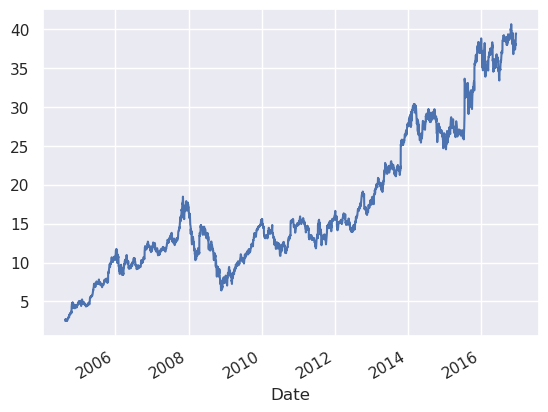

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
goog.plot();

# Resampling and converting frequencies

- `resample()` - data aggregation - reports average of period
- `asfreq()` - data selection - reports end of period

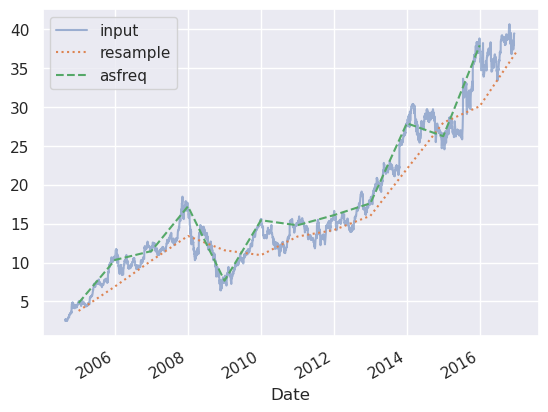

In [44]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Upsampling with imputation

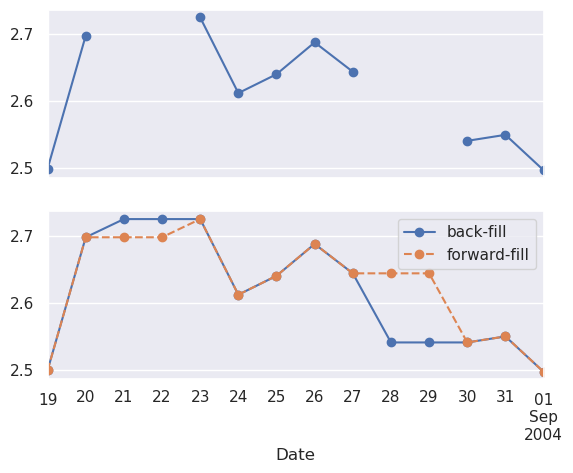

In [45]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

## Time shifts

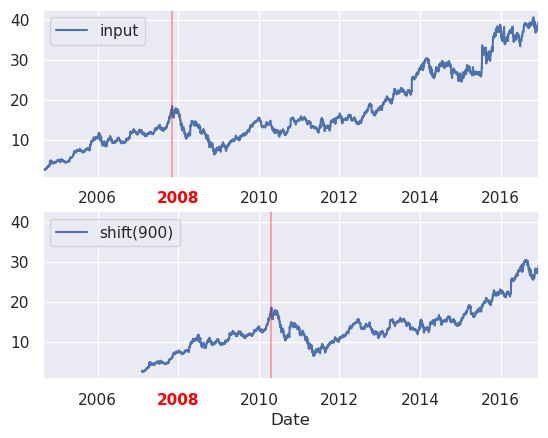

In [46]:
fig, ax = plt.subplots(2, sharey=True)

goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
# goog.index.shift(900).plot(ax=ax[2])

local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

# ax[2].legend(['tshift(900)'], loc=2)
# ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
# ax[2].axvline(local_max + offset, alpha=0.3, color='red');

<Axes: xlabel='Date'>

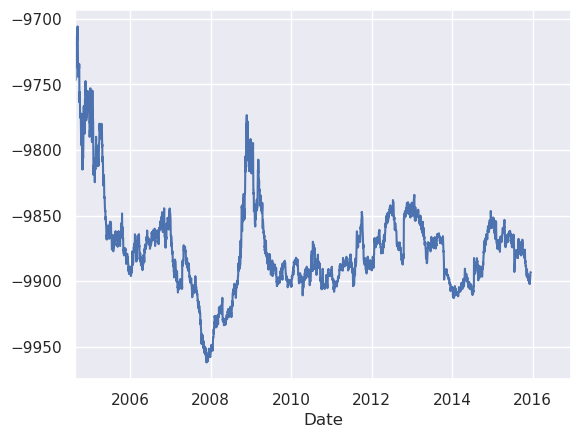

In [47]:
ROI = 100 * (goog.shift(-365)/ goog - 100)
ROI.plot()

## Rolling windows



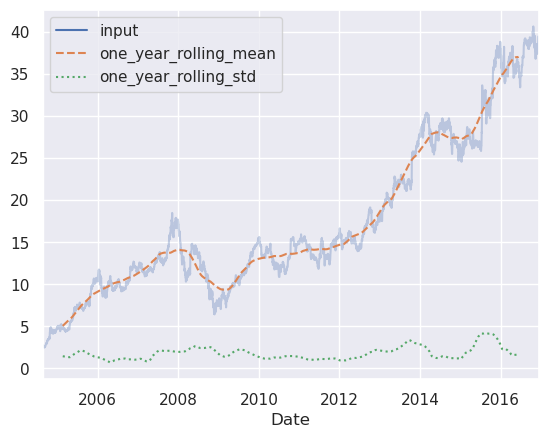

In [52]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({
    'input': goog,
    'one_year_rolling_mean': rolling.mean(),
    'one_year_rolling_std': rolling.std()
})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3);

In [53]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

/tmp/ipykernel_2736160/3227980017.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [56]:
data.columns = ['Total', 'West', 'East']
data.dropna().describe()

,Total,West,East
count,98552.000000,98552.000000,98552.000000
mean,106.024667,45.973973,60.050694
std,132.548694,60.519212,81.957561
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,59.000000,26.000000,32.000000
75%,144.000000,63.000000,79.000000
max,1097.000000,667.000000,850.000000


In [70]:
data.loc['2012-10-03':'2016-10-31']

,Total,West,East
Date,,,
2012-10-03 00:00:00,13.0,9.0,4.0
2012-10-03 01:00:00,10.0,6.0,4.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,3.0,2.0
2012-10-03 04:00:00,7.0,1.0,6.0
...,...,...,...
2016-10-31 19:00:00,72.0,23.0,49.0
2016-10-31 20:00:00,44.0,15.0,29.0
2016-10-31 21:00:00,21.0,8.0,13.0


In [71]:
data = data.loc['2012-10-03':'2016-10-31']

In [73]:
data.dropna().describe()

,Total,West,East
count,35751.000000,35751.000000,35751.000000
mean,110.573802,53.659506,56.914296
std,136.778317,74.082264,76.637902
min,0.000000,0.000000,0.000000
25%,16.000000,7.000000,7.000000
50%,62.000000,28.000000,31.000000
75%,144.500000,68.000000,73.000000
max,957.000000,667.000000,717.000000


Text(0, 0.5, 'Hourly Bicycle Count')

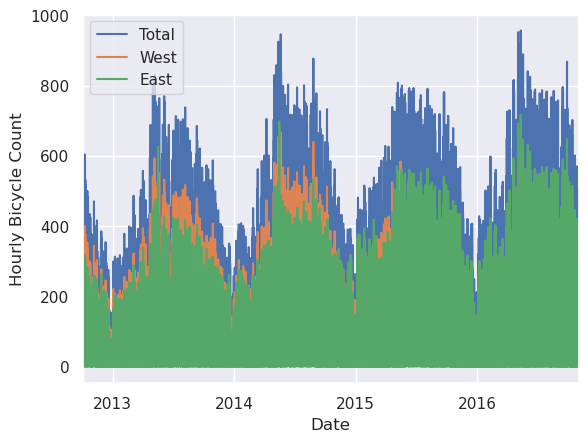

In [74]:
import seaborn as sns
sns.set()
data.plot()
plt.ylabel('Hourly Bicycle Count');

The ~25,000 hourly samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarser grid. Let's resample by week:

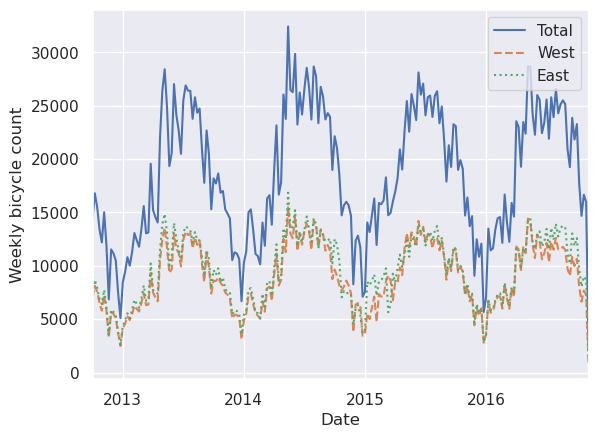

In [75]:
weekly = data.resample('W').sum()
weekly.plot(style=['-', '--', ':'])
plt.ylabel('Weekly bicycle count');

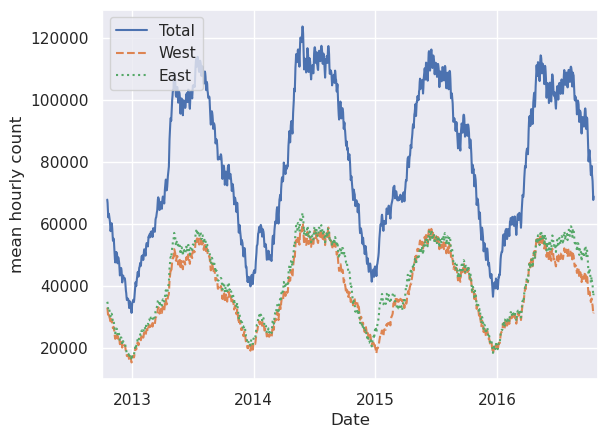

In [76]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-', '--', ':'])
plt.ylabel('mean hourly count');

The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window. The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

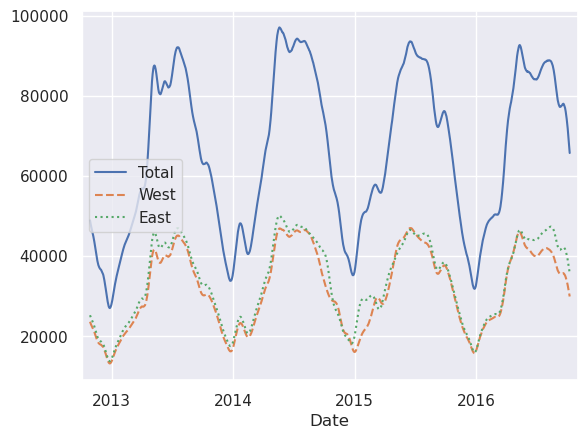

In [77]:
daily.rolling(50, center=True,
             win_type='gaussian').sum(std=10).plot(style=['-', '--', ':']);

## Digging into the data

Average traffic by time of day

### Hourly

In [78]:
by_time = data.groupby(data.index.time).mean()

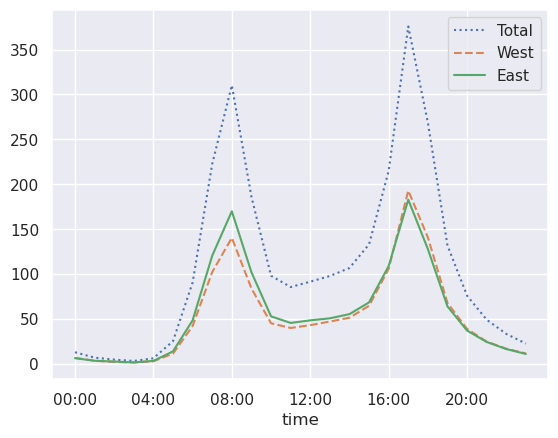

In [79]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

### by weekday

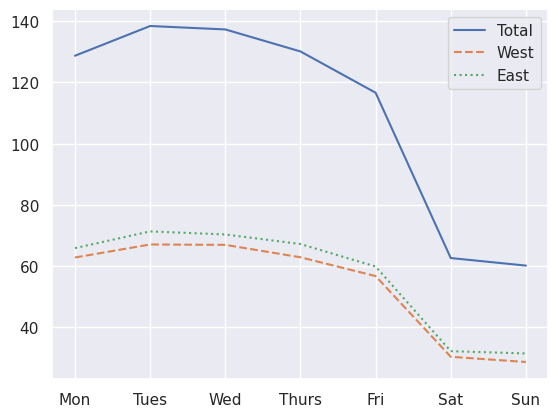

In [81]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', '--', ':']);

### Weekday vs weekend

In [82]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

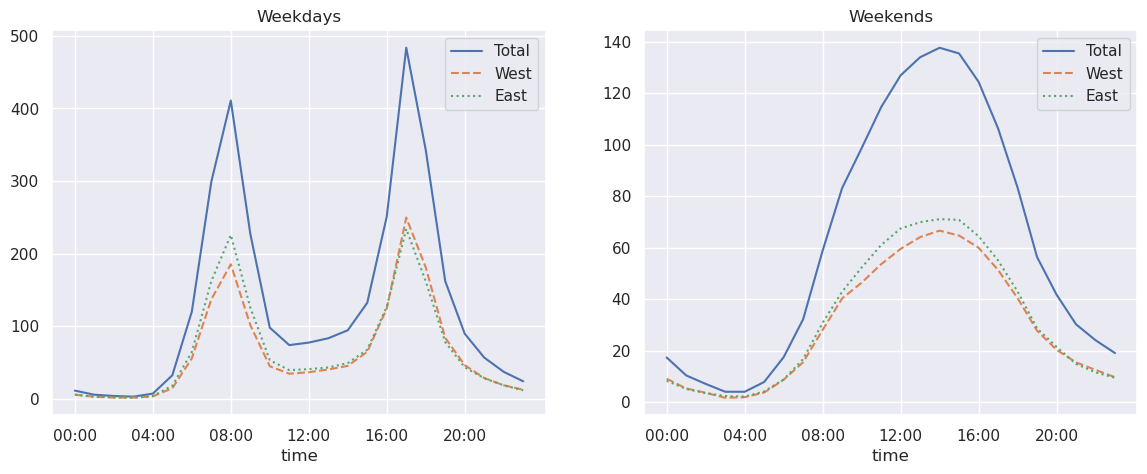

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=['-', '--', ':'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=['-', '--', ':']);

In [88]:
counts = data.copy()

In [89]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [90]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [91]:
data.to_pickle('data/counts.pkl')

In [92]:
data.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2016-10-31 14:00:00', '2016-10-31 15:00:00',
               '2016-10-31 16:00:00', '2016-10-31 17:00:00',
               '2016-10-31 18:00:00', '2016-10-31 19:00:00',
               '2016-10-31 20:00:00', '2016-10-31 21:00:00',
               '2016-10-31 22:00:00', '2016-10-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=35760, freq=None)